In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
data.drop(['ID', 'ZIP Code'], axis = 1, inplace=True)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [4]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
data.shape

(5000, 12)

In [6]:
data['Experience'][data['Experience'] < 0] = data['Experience'].mean()
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.328688,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253009,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.104600,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
data.drop_duplicates(inplace=True)
data.shape

(4987, 12)

In [8]:
data['ann_CV'] = data['CCAvg'] * 12
data.drop('CCAvg', axis = 1, inplace = True)
data

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CV
0,25,1.0,49,4,1,0,0,1,0,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,3,0,0,0,0,1,0,22.8
4996,30,4.0,15,4,1,85,0,0,0,1,0,4.8
4997,63,39.0,24,2,3,0,0,0,0,0,0,3.6
4998,65,40.0,49,3,2,0,0,0,0,1,0,6.0


<function matplotlib.pyplot.show(close=None, block=None)>

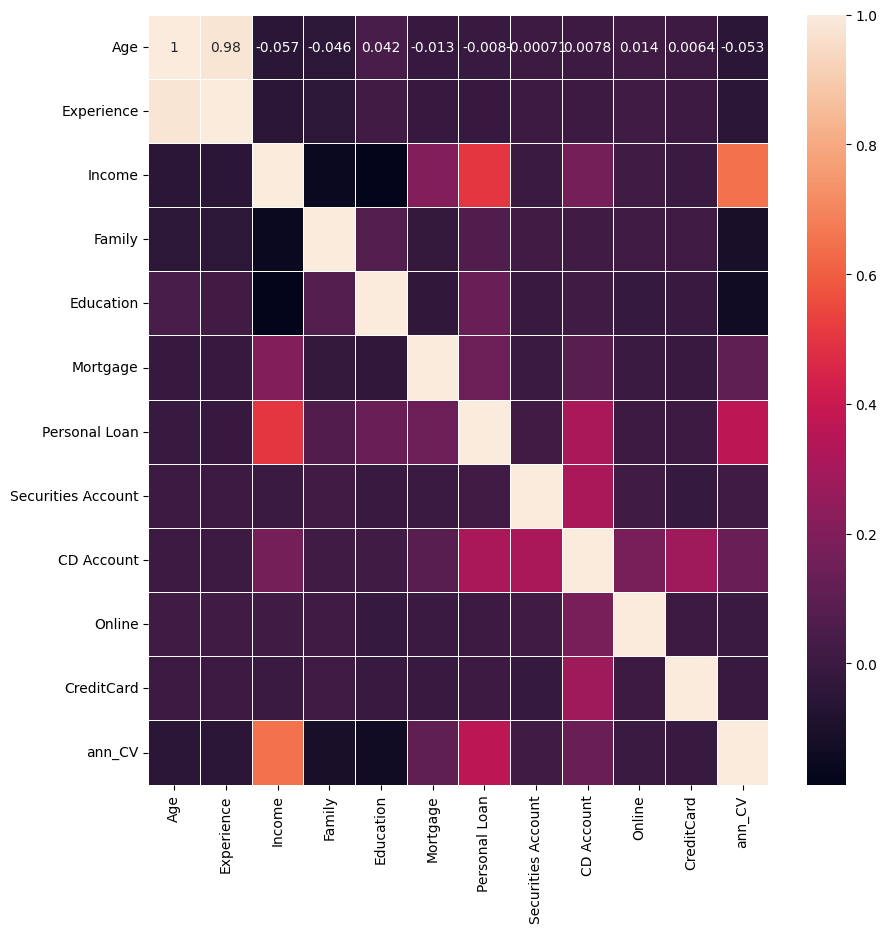

In [9]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(),cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show

Observed:
- Income and experience are correlated with each other
- Income and ann_cv are correlated with each other
- Personal loan has correlation with income, ann_cv, mortgage, and education
- Mortgage has moderate correlation with income
- Income influences ann_cv, personal loan, cd account, and Mortgage

<Axes: xlabel='Age', ylabel='Income'>

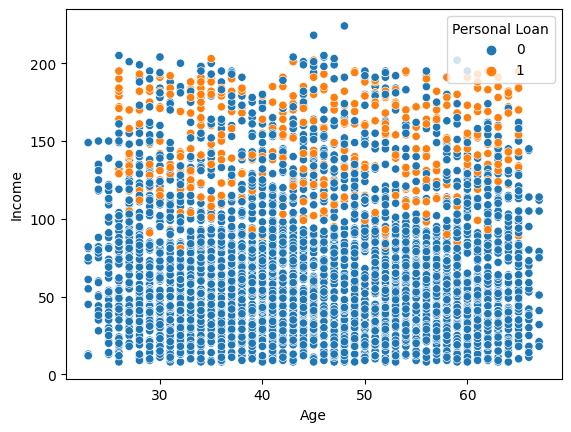

In [10]:
sns.scatterplot(x = 'Age', y = 'Income', data = data, hue = 'Personal Loan') # >100 will get loan

<Axes: xlabel='Age', ylabel='ann_CV'>

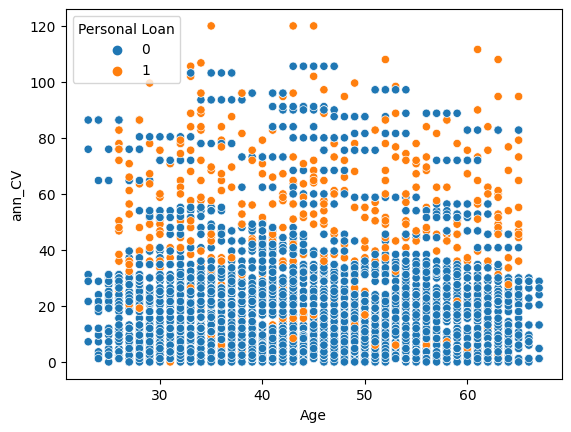

In [11]:
sns.scatterplot(x = 'Age', y = 'ann_CV', data = data, hue = 'Personal Loan') # anncv>35 will get loan

From above last two plots, we observed that 
- Income more than 100K are more likely to get loan
- If ann_cv more than 30 are more likely to get loan

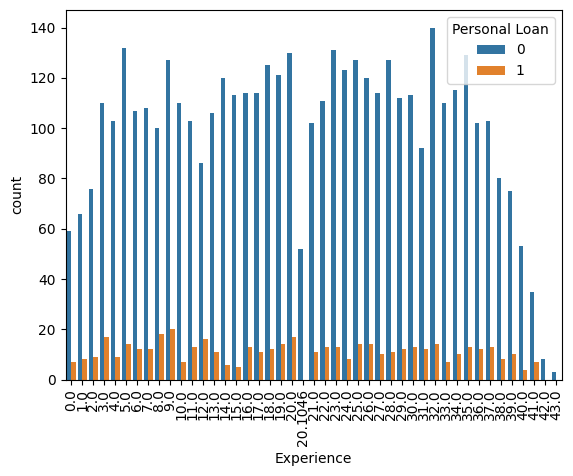

In [12]:
sns.countplot(x='Experience', hue = 'Personal Loan', data = data)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Family', ylabel='count'>

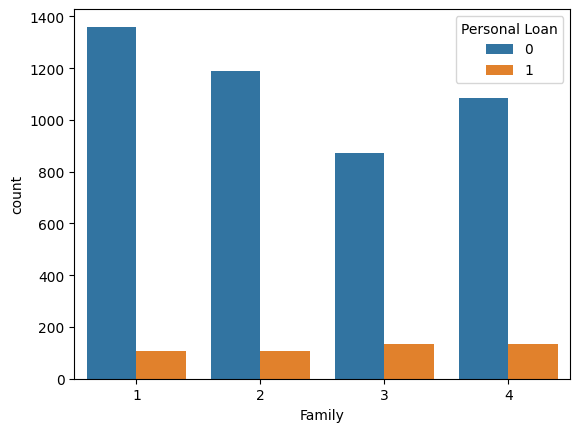

In [13]:
sns.countplot(x='Family', hue = 'Personal Loan', data = data) # family-> family size of the customer

From the last two graphs the feature 'Family' and 'Experience' has low effect in the target personal loan attribute

<Axes: xlabel='CreditCard', ylabel='count'>

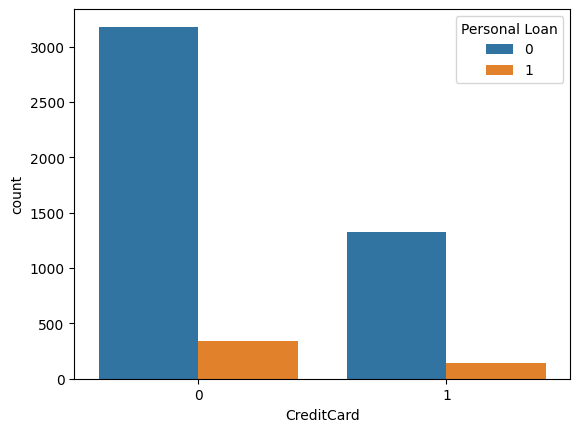

In [14]:
sns.countplot(x='CreditCard', hue = 'Personal Loan', data = data)

<Axes: xlabel='Securities Account', ylabel='count'>

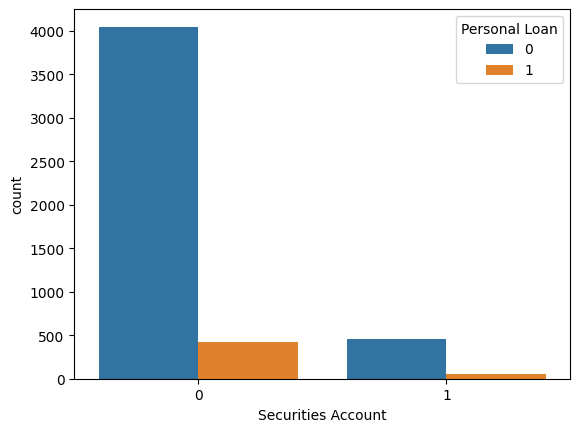

In [15]:
sns.countplot(x='Securities Account', hue = 'Personal Loan', data = data)

<Axes: xlabel='CD Account', ylabel='count'>

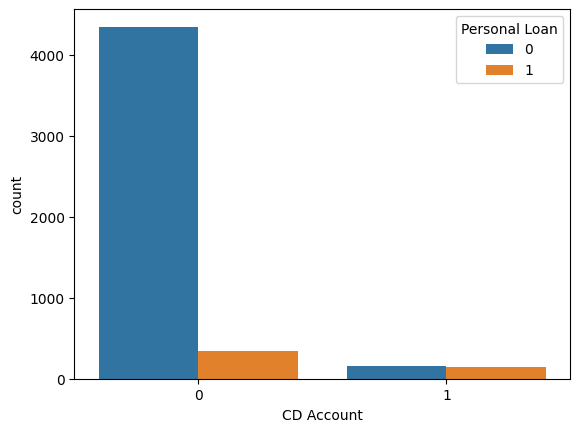

In [16]:
sns.countplot(x='CD Account', hue = 'Personal Loan', data = data)

After the plotting, we'll work on the data with all columns except 'ID' and 'ZIP code' columns.

### Spliting the data into training and test set

In [17]:
x = data.drop('Personal Loan', axis = 1).values

In [18]:
y = data['Personal Loan'].values
y=y.reshape((-1, 1))

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [20]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3490, 11), (1497, 11), (3490, 1), (1497, 1))

### Logistic Regression

In [21]:
logm=LogisticRegression(solver='liblinear')

In [22]:
logm.fit(xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [23]:
ypred = logm.predict(xtest)

In [24]:
print(logm.score(xtrain,ytrain)*100)

94.67048710601719


In [25]:
print(f'Accuracy Score: {accuracy_score(ytest, ypred)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ytest, ypred))
print(f'\nClassification Report: \n',classification_report(ytest, ypred))

Accuracy Score: 95.19%

Confusion Matrix: 
 [[1342   16]
 [  56   83]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1358
           1       0.84      0.60      0.70       139

    accuracy                           0.95      1497
   macro avg       0.90      0.79      0.84      1497
weighted avg       0.95      0.95      0.95      1497



### K Neighbors Classifier

In [26]:
knum = KNeighborsClassifier (n_neighbors=3)

In [27]:
knum.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [28]:
ypredk = knum.predict(xtest)

In [29]:
print(knum.score(xtrain,ytrain)*100)

95.78796561604584


In [30]:
print(f'Accuracy Score: {accuracy_score(ytest, ypredk)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ytest, ypredk))
print(f'\nClassification Report: \n',classification_report(ytest, ypredk))

Accuracy Score: 92.25%

Confusion Matrix: 
 [[1314   44]
 [  72   67]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1358
           1       0.60      0.48      0.54       139

    accuracy                           0.92      1497
   macro avg       0.78      0.72      0.75      1497
weighted avg       0.92      0.92      0.92      1497



### Decision Tree Classifier

In [31]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best', random_state=33)

In [32]:
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=33)

In [33]:
ypredt = tree.predict(xtest)

In [34]:
print(tree.score(xtrain,ytrain)*100)

98.45272206303724


In [35]:
print(f'Accuracy Score: {accuracy_score(ytest, ypredt)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ytest, ypredt))
print(f'\nClassification Report: \n',classification_report(ytest, ypredt))

Accuracy Score: 98.33%

Confusion Matrix: 
 [[1355    3]
 [  22  117]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1358
           1       0.97      0.84      0.90       139

    accuracy                           0.98      1497
   macro avg       0.98      0.92      0.95      1497
weighted avg       0.98      0.98      0.98      1497



### Random Forest Classifier

In [36]:
rnum = RandomForestClassifier(n_estimators=400, criterion='gini', max_depth=2, random_state = 33)

In [37]:
rnum.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, n_estimators=400, random_state=33)

In [38]:
ypredr = rnum.predict(xtest)

In [39]:
print(rnum.score(xtrain,ytrain)*100)

91.40401146131805


In [40]:
print(f'Accuracy Score: {accuracy_score(ytest, ypredr)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ytest, ypredr))
print(f'\nClassification Report: \n',classification_report(ytest, ypredr))

Accuracy Score: 91.45%

Confusion Matrix: 
 [[1358    0]
 [ 128   11]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1358
           1       1.00      0.08      0.15       139

    accuracy                           0.91      1497
   macro avg       0.96      0.54      0.55      1497
weighted avg       0.92      0.91      0.88      1497



### Voting Classifier

In [41]:
Vote = VotingClassifier(estimators=[('tree_class', tree), ('logistig_model', logm), ('k_class', knum), ('Random_class', rnum)], 
                                voting='hard')

In [42]:
Vote.fit(xtrain, ytrain)

VotingClassifier(estimators=[('tree_class',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=33)),
                             ('logistig_model',
                              LogisticRegression(solver='liblinear')),
                             ('k_class', KNeighborsClassifier(n_neighbors=3)),
                             ('Random_class',
                              RandomForestClassifier(max_depth=2,
                                                     n_estimators=400,
                                                     random_state=33))])

In [43]:
ypredv = Vote.predict(xtest)

In [44]:
print(Vote.score(xtrain,ytrain)*100)

94.87106017191978


In [45]:
print(f'Accuracy Score: {accuracy_score(ytest, ypredv)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ytest, ypredv))
print(f'\nClassification Report: \n',classification_report(ytest, ypredv))

Accuracy Score: 94.52%

Confusion Matrix: 
 [[1358    0]
 [  82   57]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1358
           1       1.00      0.41      0.58       139

    accuracy                           0.95      1497
   macro avg       0.97      0.71      0.78      1497
weighted avg       0.95      0.95      0.93      1497



### Using Smote to balance the data

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
xnew , ynew = smote.fit_resample(x,y)

In [47]:
feat = PolynomialFeatures(degree = 3)

In [48]:
xnew = feat.fit_transform(xnew)

### Spliting the data into train and test after sampling and polynomial operations

In [49]:
xnewtrain, xnewtest, ynewtrain, ynewtest = train_test_split(xnew, ynew, test_size=0.30, random_state=42)

In [50]:
ynewtrain= ynewtrain.reshape(-1,1)
ynewtest = ynewtest.reshape(-1,1)

### Logistic Regression

In [51]:
logm2=LogisticRegression(solver='liblinear')

In [52]:
logm2.fit(xnewtrain, ynewtrain)

LogisticRegression(solver='liblinear')

In [53]:
ypredl = logm2.predict(xnewtest)

In [54]:
print(logm2.score(xnewtrain,ynewtrain)*100)

95.73624980187034


In [55]:
print(f'Accuracy Score: {accuracy_score(ynewtest, ypredl)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ynewtest, ypredl))
print(f'\nClassification Report: \n',classification_report(ynewtest, ypredl))

Accuracy Score: 95.64%

Confusion Matrix: 
 [[1311   62]
 [  56 1276]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1373
           1       0.95      0.96      0.96      1332

    accuracy                           0.96      2705
   macro avg       0.96      0.96      0.96      2705
weighted avg       0.96      0.96      0.96      2705



Resampling to prevent polynomial operation in the algo

In [56]:
xsmK , ysmK = smote.fit_resample(x,y)

In [57]:
xtrainK, xtestK, ytrainK, ytestK = train_test_split(xsmK, ysmK, test_size=0.30, random_state=42)

In [58]:
ytrainK= ytrainK.reshape(-1,1)
ytestK = ytestK.reshape(-1,1)

### K Neighbors Classifier

In [59]:
knum2 = KNeighborsClassifier (n_neighbors=2)

In [60]:
knum2.fit(xtrainK,ytrainK)

KNeighborsClassifier(n_neighbors=2)

In [61]:
ypredk2 = knum2.predict(xtestK)

In [62]:
print(knum2.score(xtrainK,ytrainK)*100)

99.44523696306862


In [63]:
print(f'Accuracy Score: {accuracy_score(ytestK, ypredk2)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ytestK, ypredk2))
print(f'\nClassification Report: \n',classification_report(ytestK, ypredk2))

Accuracy Score: 95.86%

Confusion Matrix: 
 [[1294   79]
 [  33 1299]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1373
           1       0.94      0.98      0.96      1332

    accuracy                           0.96      2705
   macro avg       0.96      0.96      0.96      2705
weighted avg       0.96      0.96      0.96      2705



### Decision Tree Classifier

In [64]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best', random_state=33)

In [65]:
tree2.fit(xnewtrain, ynewtrain)

DecisionTreeClassifier(max_depth=4, random_state=33)

In [66]:
ypredt2 = tree2.predict(xnewtest)

In [67]:
print(tree2.score(xnewtrain,ynewtrain)*100)

97.70169598985576


In [68]:
print(f'Accuracy Score: {accuracy_score(ynewtest, ypredt2)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ynewtest, ypredt2))
print(f'\nClassification Report: \n',classification_report(ynewtest, ypredt2))

Accuracy Score: 97.60%

Confusion Matrix: 
 [[1341   32]
 [  33 1299]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1373
           1       0.98      0.98      0.98      1332

    accuracy                           0.98      2705
   macro avg       0.98      0.98      0.98      2705
weighted avg       0.98      0.98      0.98      2705



### Random Forest Classifier

In [69]:
rnum2 = RandomForestClassifier(n_estimators=400, criterion='gini', max_depth=2, random_state = 33)

In [70]:
rnum2.fit(xnewtrain,ynewtrain)

RandomForestClassifier(max_depth=2, n_estimators=400, random_state=33)

In [71]:
ypredr2 = rnum2.predict(xnewtest)

In [72]:
print(rnum2.score(xnewtrain,ynewtrain)*100)

94.92788080519892


In [73]:
print(f'Accuracy Score: {accuracy_score(ynewtest, ypredr2)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ynewtest, ypredr2))
print(f'\nClassification Report: \n',classification_report(ynewtest, ypredr2))

Accuracy Score: 95.67%

Confusion Matrix: 
 [[1291   82]
 [  35 1297]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1373
           1       0.94      0.97      0.96      1332

    accuracy                           0.96      2705
   macro avg       0.96      0.96      0.96      2705
weighted avg       0.96      0.96      0.96      2705



### Voting Classifier

In [74]:
from sklearn.ensemble import VotingClassifier
vote2 = VotingClassifier(estimators=[('tree_class', tree2), ('logistig_model', logm2), ('k_class_2', knum2), ('Random_class', rnum2)], 
                                voting='hard')


In [75]:
vote2.fit(xnewtrain,ynewtrain)

VotingClassifier(estimators=[('tree_class',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=33)),
                             ('logistig_model',
                              LogisticRegression(solver='liblinear')),
                             ('k_class_2', KNeighborsClassifier(n_neighbors=2)),
                             ('Random_class',
                              RandomForestClassifier(max_depth=2,
                                                     n_estimators=400,
                                                     random_state=33))])

In [76]:
ypredv2 = vote2.predict(xnewtest)

In [77]:
print(vote2.score(xnewtrain,ynewtrain)*100)

98.16135679188461


In [78]:
print(f'Accuracy Score: {accuracy_score(ynewtest, ypredv2)*100:.2f}%')
print(f'\nConfusion Matrix: \n',confusion_matrix(ynewtest, ypredv2))
print(f'\nClassification Report: \n',classification_report(ynewtest, ypredv2))

Accuracy Score: 97.97%

Confusion Matrix: 
 [[1354   19]
 [  36 1296]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1373
           1       0.99      0.97      0.98      1332

    accuracy                           0.98      2705
   macro avg       0.98      0.98      0.98      2705
weighted avg       0.98      0.98      0.98      2705



### Now compare the best algorithm before scalling and after scalling

In [79]:
print('The classification report for the best model before scalling')
print(classification_report(ytest, Vote.predict(xtest)))
print()
print('The classification report for the best model after scalling')
print(classification_report(ynewtest, vote2.predict(xnewtest)))


The classification report for the best model before scalling
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1358
           1       1.00      0.41      0.58       139

    accuracy                           0.95      1497
   macro avg       0.97      0.71      0.78      1497
weighted avg       0.95      0.95      0.93      1497


The classification report for the best model after scalling
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1373
           1       0.99      0.97      0.98      1332

    accuracy                           0.98      2705
   macro avg       0.98      0.98      0.98      2705
weighted avg       0.98      0.98      0.98      2705



### Finally 
In the end, we found Voting Classifier is the best algorithm.

with accurecy score = 97.97 

and with f1_score = 98 %